In [1]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text


In [2]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

In [3]:
tile_url = get_tile_url("fixed", 2020, 2)
tile_url

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2020/quarter%3D2/2020-04-01_performance_fixed_tiles.zip'

In [4]:
tiles = gp.read_file('~/Downloads/hydepark.zip')


In [5]:
#for x in range(0,5):
#    print(tiles.head().iloc[:,x*10+0:x*10+10])

<AxesSubplot:>

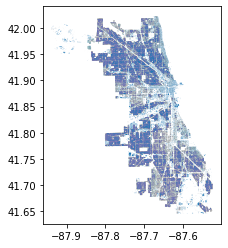

In [6]:
tiles.plot()

In [7]:
tiles.head()

,date_bldg_,time_bldg_,bldg_condi,date_bld_2,time_bld_2,date_bld_3,time_bld_3,bldg_id,bldg_name1,bldg_name2,...,stories,suf_dir1,t_add1,unit_name,vacancy_st,x_coord,y_coord,year_built,z_coord,geometry
0,1998-04-01,08:00:00.000,SOUND,1998-04-01,08:00:00.000,None,None,729719.0,None,None,...,2.0,None,10203.0,None,None,1.166255e+06,1.836901e+06,1899.0,0.0,"POLYGON ((-87.66673 41.70798, -87.66687 41.707..."
1,1998-04-01,08:00:00.000,SOUND,1998-04-01,08:00:00.000,None,None,46828.0,None,None,...,2.0,None,5901.0,None,None,1.145427e+06,1.938878e+06,1937.0,0.0,"POLYGON ((-87.74055 41.98824, -87.74055 41.988..."
2,1998-04-01,08:00:00.000,SOUND,1998-04-01,08:00:00.000,None,None,244234.0,None,None,...,1.0,None,2830.0,None,None,1.131180e+06,1.918226e+06,1957.0,0.0,"POLYGON ((-87.79347 41.93183, -87.79347 41.931..."
3,1998-04-01,08:00:00.000,None,1998-04-01,08:00:00.000,None,None,451013.0,None,None,...,0.0,None,0.0,None,None,1.147973e+06,1.872647e+06,0.0,0.0,"POLYGON ((-87.73285 41.80646, -87.73285 41.806..."
4,1998-04-01,08:00:00.000,None,1998-04-01,08:00:00.000,None,None,601329.0,None,None,...,0.0,None,0.0,None,None,1.165814e+06,1.854248e+06,0.0,0.0,"POLYGON ((-87.66794 41.75560, -87.66794 41.755..."


<AxesSubplot:>

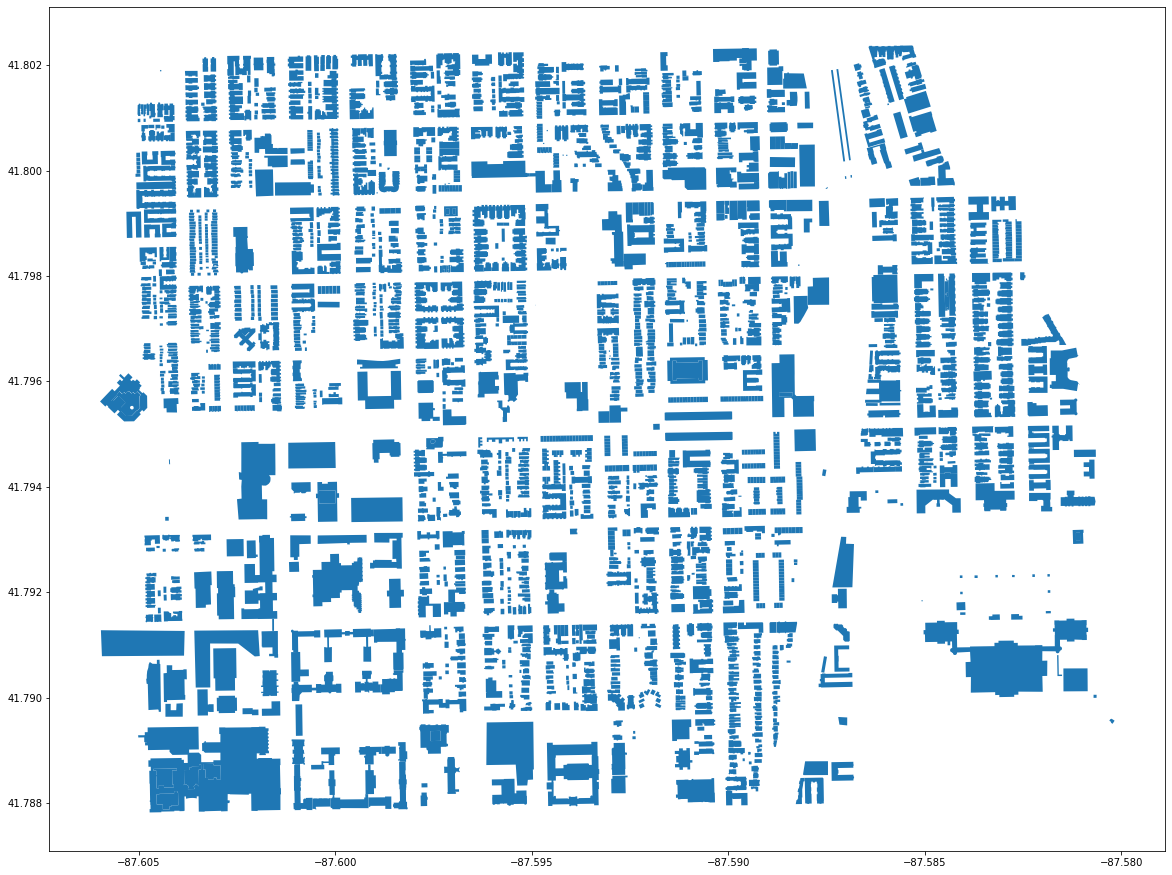

In [8]:
(tiles.cx[-87.605:-87.580,41.787:41.802]).plot(figsize=(20,20))

In [40]:
(tiles.cx[-87.605:-87.580,41.787:41.802])

,date_bldg_,time_bldg_,bldg_condi,date_bld_2,time_bld_2,date_bld_3,time_bld_3,bldg_id,bldg_name1,bldg_name2,...,stories,suf_dir1,t_add1,unit_name,vacancy_st,x_coord,y_coord,year_built,z_coord,geometry
108,1998-04-01,08:00:00.000,None,1998-04-01,08:00:00.000,None,None,465087.0,None,None,...,0.0,None,0.0,None,None,1.184891e+06,1.870253e+06,0.0,0.0,"POLYGON ((-87.59752 41.79908, -87.59752 41.799..."
1112,1998-04-01,08:00:00.000,None,1998-04-01,08:00:00.000,None,None,471019.0,None,None,...,0.0,None,5426.0,None,None,1.188859e+06,1.869648e+06,0.0,0.0,"POLYGON ((-87.58289 41.79730, -87.58291 41.797..."
3252,1998-04-01,08:00:00.000,SOUND,1998-04-01,08:00:00.000,None,None,479442.0,None,None,...,12.0,None,1765.0,None,None,1.189262e+06,1.868770e+06,1925.0,0.0,"POLYGON ((-87.58175 41.79470, -87.58175 41.794..."
4745,1998-04-01,08:00:00.000,SOUND,1998-04-01,08:00:00.000,None,None,474854.0,None,None,...,2.0,None,5454.0,None,None,1.186404e+06,1.869281e+06,1888.0,0.0,"POLYGON ((-87.59199 41.79639, -87.59199 41.796..."
5037,1998-04-01,08:00:00.000,None,1998-04-01,08:00:00.000,None,None,466292.0,None,None,...,0.0,None,0.0,None,None,1.184473e+06,1.870118e+06,0.0,0.0,"POLYGON ((-87.59898 41.79876, -87.59906 41.798..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819989,1998-04-01,08:00:00.000,None,1998-04-01,08:00:00.000,None,None,485624.0,None,None,...,0.0,None,0.0,None,None,1.186583e+06,1.868102e+06,0.0,0.0,"POLYGON ((-87.59147 41.79313, -87.59148 41.793..."
820283,2007-12-12,08:00:00.000,None,2007-12-12,08:00:00.000,None,None,871246.0,RAY SCHOOL,None,...,0.0,None,5641.0,None,None,1.185759e+06,1.867774e+06,0.0,0.0,"POLYGON ((-87.59422 41.79257, -87.59411 41.792..."
820347,1998-04-01,08:00:00.000,None,1998-04-01,08:00:00.000,None,None,464670.0,None,None,...,0.0,None,5301.0,None,None,1.184794e+06,1.870309e+06,0.0,0.0,"POLYGON ((-87.59794 41.79923, -87.59794 41.799..."
820572,1998-04-01,08:00:00.000,SOUND,1998-04-01,08:00:00.000,None,None,496991.0,None,None,...,2.0,None,5759.0,None,None,1.187283e+06,1.866877e+06,1888.0,0.0,"POLYGON ((-87.58887 41.78975, -87.58887 41.789..."


In [34]:
rent_df = pd.read_csv('example.csv')
gdf = gp.GeoDataFrame(
    rent_df, geometry=gp.points_from_xy(rent_df.longitude, rent_df.latitude))
gdf.crs=tiles.crs

#rent_df['geometry'] = 'Point('+rent_df['latitude'].astype('string')+','+rent_df['longitude'].astype('string')+')'

joined_gdf = gp.sjoin((tiles.cx[-87.605:-87.580,41.787:41.802]), gdf, op='contains')

/Users/grey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

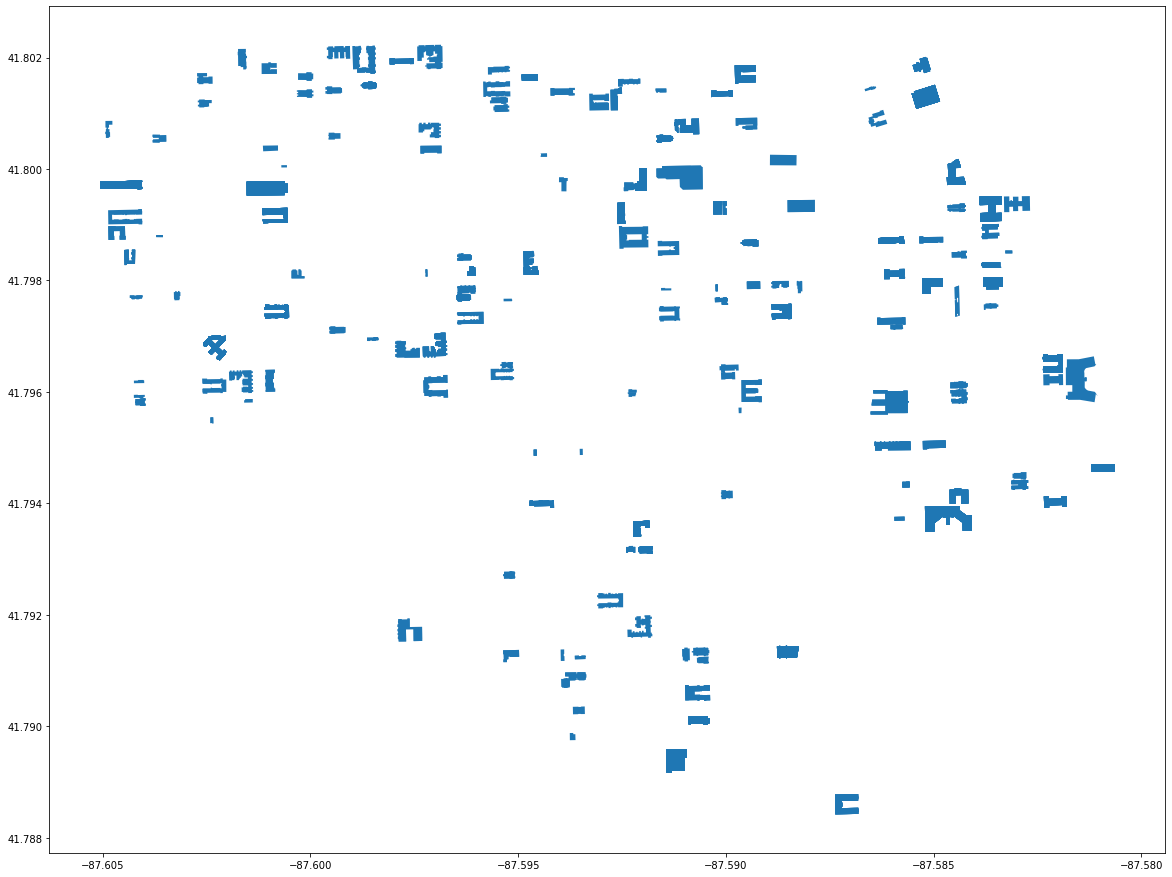

In [43]:
joined_gdf.plot(figsize=(20,20))
#joined_gdf

In [10]:
county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip" 
counties = gp.read_file(county_url)


In [11]:
il_counties = counties.loc[counties['STATEFP'] == '17'].to_crs(4326) 


In [12]:
il_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
85,17,067,00424235,17067,Hancock,Hancock County,06,H1,G4020,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,"POLYGON ((-91.37421 40.46399, -91.37385 40.464..."
92,17,025,00424214,17025,Clay,Clay County,06,H1,G4020,None,None,None,A,1212815740,3271820,+38.7468187,-088.4823254,"POLYGON ((-88.69517 38.82630, -88.69516 38.826..."
131,17,185,00424293,17185,Wabash,Wabash County,06,H1,G4020,None,None,None,A,578403998,10973558,+38.4458209,-087.8391674,"POLYGON ((-87.94460 38.44581, -87.94405 38.446..."
148,17,113,01784833,17113,McLean,McLean County,06,H1,G4020,145,14010,None,A,3064600918,7801224,+40.4945594,-088.8445391,"POLYGON ((-89.26650 40.48555, -89.26653 40.486..."
158,17,005,00424204,17005,Bond,Bond County,06,H1,G4020,476,41180,None,A,985073265,6462629,+38.8859240,-089.4365916,"POLYGON ((-89.36179 39.02772, -89.35987 39.027..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,17,111,01784815,17111,McHenry,McHenry County,06,H1,G4020,176,16980,16984,A,1562786765,19872668,+42.3242982,-088.4522450,"POLYGON ((-88.23789 42.49489, -88.23428 42.494..."
2922,17,015,00424209,17015,Carroll,Carroll County,06,H1,G4020,None,None,None,A,1153597403,55881824,+42.0709000,-089.9241894,"POLYGON ((-90.16133 42.10972, -90.16135 42.110..."
2987,17,047,00424225,17047,Edwards,Edwards County,06,H1,G4020,None,None,None,A,576012469,781202,+38.4170954,-088.0479408,"POLYGON ((-88.14813 38.44393, -88.14812 38.445..."
2996,17,071,00424237,17071,Henderson,Henderson County,06,H1,G4020,161,15460,None,A,981077355,42557372,+40.8144710,-090.9412464,"POLYGON ((-91.01390 40.89562, -91.01324 40.896..."


In [13]:
tiles_in_il_counties = gp.sjoin(tiles, il_counties, how="inner", op='intersects')


/Users/grey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/jc/6wyz3_ld0137ldxkzfbsq13w0000gn/T/ipykernel_78053/347214734.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...
Right CRS: EPSG:4326

  tiles_in_il_counties = gp.sjoin(tiles, il_counties, how="inner", op='intersects')


In [14]:
tiles_in_ky_counties['avg_d_mbps'] = tiles_in_il_counties['avg_d_kbps'] / 1000
tiles_in_ky_counties['avg_u_mbps'] = tiles_in_il_counties['avg_u_kbps'] / 1000

KeyError: 'avg_d_kbps'